In [26]:
# importing necessary lib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv("diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### We can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? you can do a quick search to see that one cannot have 0 values for these.
### Let's deal with that. we can either remove such data or simply replace it with their respective mean values.

In [7]:
# here few misconspection is their like BMI can't be zero and BP, glucose and skin thickness of a person can't be zero
# now replacing the zero with the mean value.
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())

<AxesSubplot: >

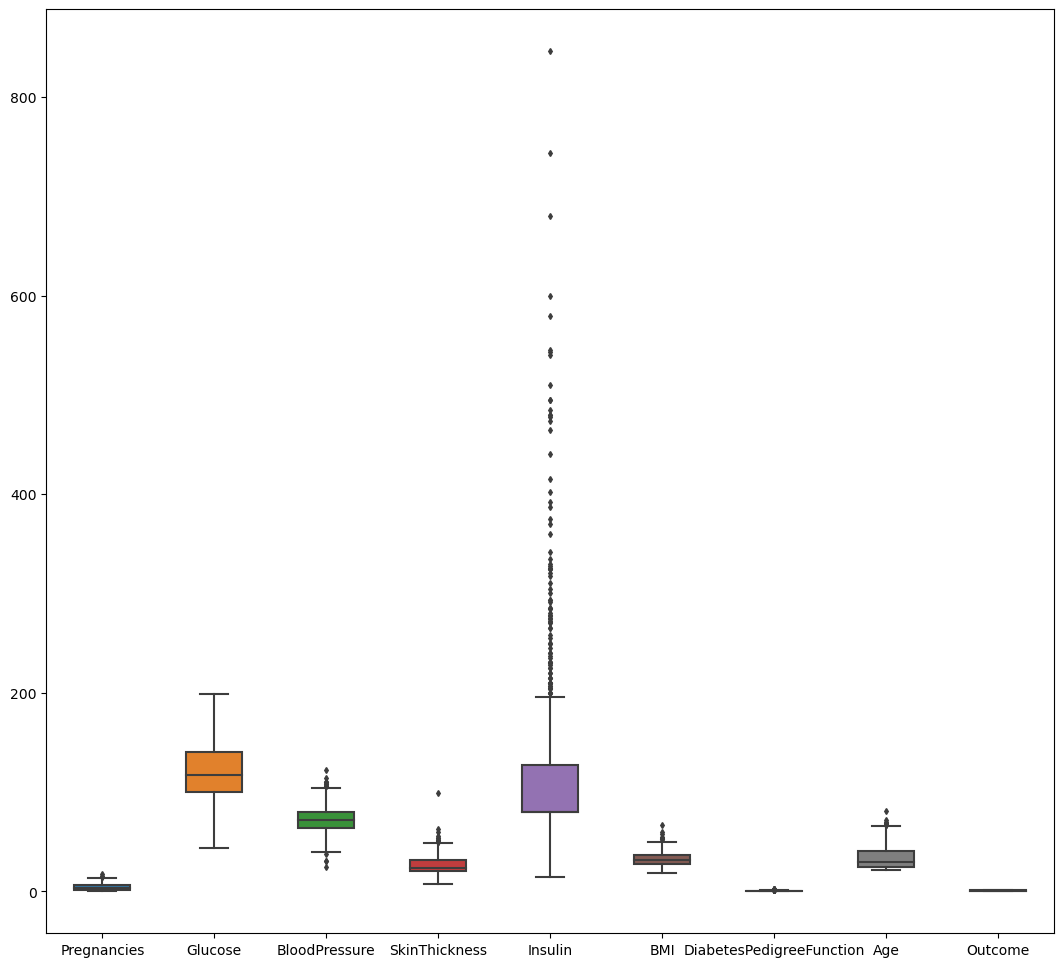

In [8]:
# let's visualize the outliers 
fig,ax= plt.subplots(figsize=(13,12))
sns.boxplot(data=data,width=0.5, ax=ax, fliersize=3)

In [9]:
# let's segregate the dependent and independent variable
X=data.drop(columns=['Outcome'])
y=data['Outcome']

In [10]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [11]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25, random_state=43)
X_train.shape,X_test.shape

((576, 8), (192, 8))

In [18]:
import pickle
def scaler_standard(X_train,X_test):
    scaler= StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    
    # Saving the model
    file= open('StandardScaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    
    return X_train_scaled, X_test_scaled
    

In [19]:
X_train_scaled, X_test_scaled= scaler_standard(X_train, X_test)

In [20]:
X_train_scaled

array([[ 0.04819382,  0.32591984, -0.36696872, ...,  0.043467  ,
        -0.94846851, -0.44617287],
       [ 0.34350917,  1.57132233, -0.69018936, ...,  0.01463363,
        -1.02543203,  0.67872358],
       [ 1.82008591,  0.59519606,  0.60269318, ..., -0.82153398,
         2.99514234,  2.06321153],
       ...,
       [-1.13306757, -0.58288737, -0.69018936, ..., -0.7206172 ,
        -0.0433775 , -0.87882536],
       [-0.83775222, -0.27995164, -0.69018936, ...,  0.11555041,
         0.23061264, -1.05188635],
       [ 0.04819382,  0.25860079, -1.01341   , ..., -0.76386725,
         0.18135599, -0.18658138]])

In [21]:
## model training
log_reg= LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [22]:
## Hyperparameter Tuning
## GridSearch CV
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')
## parameter
parameter= {'penalty':['l1','l2'], 
            'C': np.logspace(-3,3,7),
            'solver':['newton-cg','lbfgs','liblinear']}


In [23]:
logreg= LogisticRegression()
clf= GridSearchCV(logreg,                        # model         
                  param_grid= parameter,         # hyperparameter
                  scoring= 'accuracy',           # metric for scoring
                  cv=10)                         # number of folds
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [25]:
clf.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [27]:
clf.best_score_

0.7655474894131882

In [28]:
y_pred= clf.predict(X_test_scaled)

In [29]:
conf_mtx= confusion_matrix(y_test, y_pred)
conf_mtx

array([[114,  10],
       [ 31,  37]])

In [31]:
accuracy= accuracy_score(y_test, y_pred)
accuracy

0.7864583333333334

In [32]:
class_repo= classification_report(y_test, y_pred)
class_repo

'              precision    recall  f1-score   support\n\n           0       0.79      0.92      0.85       124\n           1       0.79      0.54      0.64        68\n\n    accuracy                           0.79       192\n   macro avg       0.79      0.73      0.75       192\nweighted avg       0.79      0.79      0.78       192\n'

In [33]:
file= open('modelforPrediction.pkl','wb')
pickle.dump(log_reg,file)
file.close()